# Topographical Analysis - Moon and Mars
## Enxhi Buxheli

Source [for data and documentation]: https://ode.rsl.wustl.edu/moon/indexDatasets.aspx

In [1]:
# Makes the plots inline in the notebook
%matplotlib inline

# Loading the libraries
import numpy as np
import matplotlib.pyplot as plt

# # To read in .nc files, the below lines are needed
# import sys
# !{sys.executable} -m pip install netCDF4
# import netCDF4

### (a) 
In January 1994, Clementine - a lunar space probe officially named the Deep Space Program Science Experiment (DSPSE) - was launched by a Titan IIG rocket from the Vanderberg Air Force Base in California with a payload of $227 \,kg$. The primary purpose of the mission was to showcase the capabilities of lighter, smaller, and lower cost deep space probes and to evaluate their effectiveness while exposed to deep space. While showcasing the technology, it was also able to successfully return LIDAR (Laser Image Detection and Ranging) data while it orbited the moon (from February 1994 to May 1994) and until it lost contact with Earth in May of 1995. 

The LIDAR imaging that Clementine provided us with generated an image of the lunar surface and helped us better understand what the surface of the Moon - Earth's largest natural satellite - looked like. When the data was collected, a map was made of the lunar surface that identified certain relief/crust features such as craters, basins, and mountains using LIDAR. The laser pulse used to collect this data had a wavelength of $1064\, nm$ and when it was reflected from the moon's surface, the pulse was received by an avalanche photodiode (APD) detector. When the pulse was reflected, there would be a resulting increase in voltage which was amplified and when it would pass a certain pre-programmed threshold, was used to measure the travel time of the pulse which was then stored. These pulses made the three-dimensional high resolution mapping of the lunar surface possible.

The topographical dataset was produced in collaboration with NASA Planetary Data System (PDS), but is hosted by the PDS Geosciences Node at Washington University in St. Louis.

### (b)

In [20]:
# Reading in the NASA PDS topographical data into an array
fname_moon = 'topogrd1.dat'
moon_topo = np.genfromtxt(fname_moon)

# According to the documentation, the file is supposed to be 
# 180x360 so we must reshape
moon_reshaped = np.reshape(moon_topo, (180,360))

In [21]:
# Creating an array of the latitude and longitude values used
## The documentation specifies that latitude is from 89.5 to -89.5
## and that longitude spans from 0.5 to 359.5
lat_moon  = np.linspace(89.5, -89.5, 360)
long_moon = np.linspace(0.5,  359.5, 180)

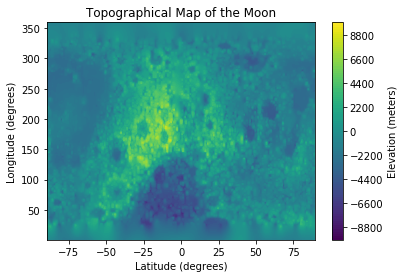

In [22]:
# Plotting the topography of the Moon
plt.contourf(lat_moon, long_moon, moon_reshaped, levels=np.linspace(-10000,10000,101))

# Changing the coloring of features
contours_color = plt.colorbar()
contours_color.set_label("Elevation (meters)")

# Giving it a title and labelling the axes
plt.title("Topographical Map of the Moon")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Longitude (degrees)")

# Outputting the plot
plt.show()

In the above topographical plot of the Moon's surface, we can see that there are portions of the surface that are depressed (with an altitude below 0 meters) and features that are raised. We also see some wide basins with a fairly consistent altitude across the feature. For the larger topographic features, like the large basins with a fairly consistent alitude across the feater, are the result of the density of the moon's crust while it was forming. The smaller topographic features we see - those with a very clearly defined center with a sharp change in altitude associate with it - are likely the result of meteorite impacts on the moons surface. The reason that we see so many of these smaller topographic features is likely the result of the Moon's lack of an atmosphere. This is because without an adequate atmosphere, the Moon remains unprotected from impacts by meteorites, unlike the Earth which has an adequate atmosphere such that the majority of meteorites burn up.

### (c)

In [5]:
# Reading in the Mars topographic file
fname_mars = 'mars-topo.nc'
mars_topo = netCDF4.Dataset(fname_mars)

In [23]:
# Specifying the latitude, longitude, and elevation variables
# from the topographic dataset read in
lat_mars  = mars_topo.variables['latitude'][:]
long_mars = mars_topo.variables['longitude'][:]
elevation = mars_topo.variables['zMOL'][:] * 1000

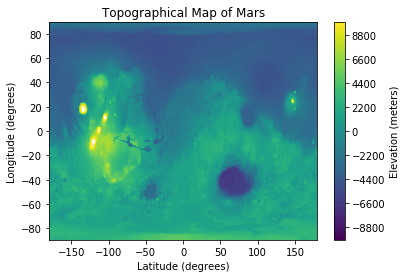

In [26]:
# Plotting the topography of the Moon
plt.contourf(long_mars, lat_mars, elevation, levels=np.linspace(-10000,10000,101))

# Changing the coloring of features
contours_color = plt.colorbar()
contours_color.set_label("Elevation (meters)")

# Giving it a title and labelling the axes
plt.title("Topographical Map of Mars")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Longitude (degrees)")

# Outputting the plot
plt.show()

Mars has a greater number of large topographical features and very few small topographic features. This is likely because of the presence of an atmosphere around Mars which protects it from the constant bombardment of meteorites. The primary source of Mars' topographic variability is therefore likely the result of how the crust was formed.

### (d)

##### Moon

In [8]:
# Flattening the moon data to make a histogram of the altitudes present
# on the surface
moon_flat = moon_reshaped.flatten()

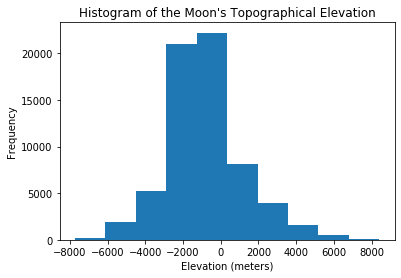

In [29]:
# Plotting the histogram for the moon
plt.hist(moon_flat)

# Giving it a title and labelling the axes
plt.title("Histogram of the Moon's Topographical Elevation")
plt.xlabel("Elevation (meters)")
plt.ylabel("Frequency")

# Outputting the plot
plt.show()

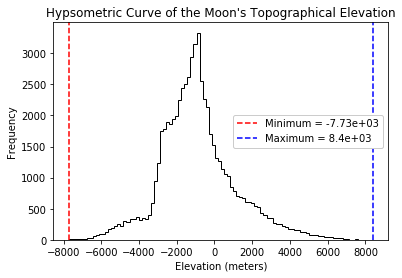

In [30]:
### PLOTTING HYPSOMETRIC CURVES ###

# For the moon
plt.hist(moon_flat, color = "black", bins = 100, histtype = "step")

# Giving it a title and labelling the axes
plt.title("Hypsometric Curve of the Moon's Topographical Elevation")
plt.xlabel("Elevation (meters)")
plt.ylabel("Frequency")

# Finding the minimum and maximum of the data to label on the curve
min_moon = moon_flat.min()
max_moon = moon_flat.max()

# Adding the label to the plot
plt.axvline(min_moon, label = 'Minimum = %.3g'%min_moon, ls='--', c = 'r')
plt.axvline(max_moon, label = 'Maximum = %.3g'%max_moon, ls='--', c = 'b')

# Positioning the legend
plt.legend(loc = 5, framealpha = 1)

# Outputting the plot
plt.show()

##### Mars

In [10]:
# Flattening the mars data to make a histogram of the altitudes present
# on the surface
mars_flat = elevation.flatten()

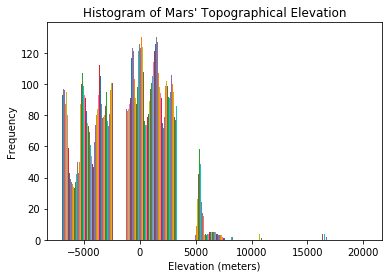

In [32]:
# Plotting the histogram for the moon
plt.hist(elevation, bins = 5)

# Giving it a title and labelling the axes
plt.title("Histogram of Mars' Topographical Elevation")
plt.xlabel("Elevation (meters)")
plt.ylabel("Frequency")

# Outputting the plot
plt.show()

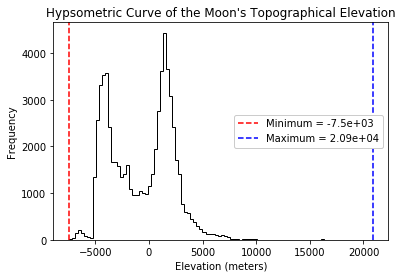

In [31]:
### PLOTTING HYPSOMETRIC CURVES ###

# For mars
plt.hist(mars_flat, color = "black", bins = 100, histtype = "step")

# Giving it a title and labelling the axes
plt.title("Hypsometric Curve of the Moon's Topographical Elevation")
plt.xlabel("Elevation (meters)")
plt.ylabel("Frequency")

# Finding the minimum and maximum of the data to label on the curve
min_mars = mars_flat.min()
max_mars = mars_flat.max()

# Adding the label to the plot
plt.axvline(min_mars, label = 'Minimum = %.3g'%min_mars, ls='--', c = 'r')
plt.axvline(max_mars, label = 'Maximum = %.3g'%max_mars, ls='--', c = 'b')

# Positioning the legend
plt.legend(loc = 5, framealpha = 1)

# Outputting the plot
plt.show()